In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

In [8]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [9]:
housing_df = pd.DataFrame(data = housing.data, columns = housing.feature_names)

housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

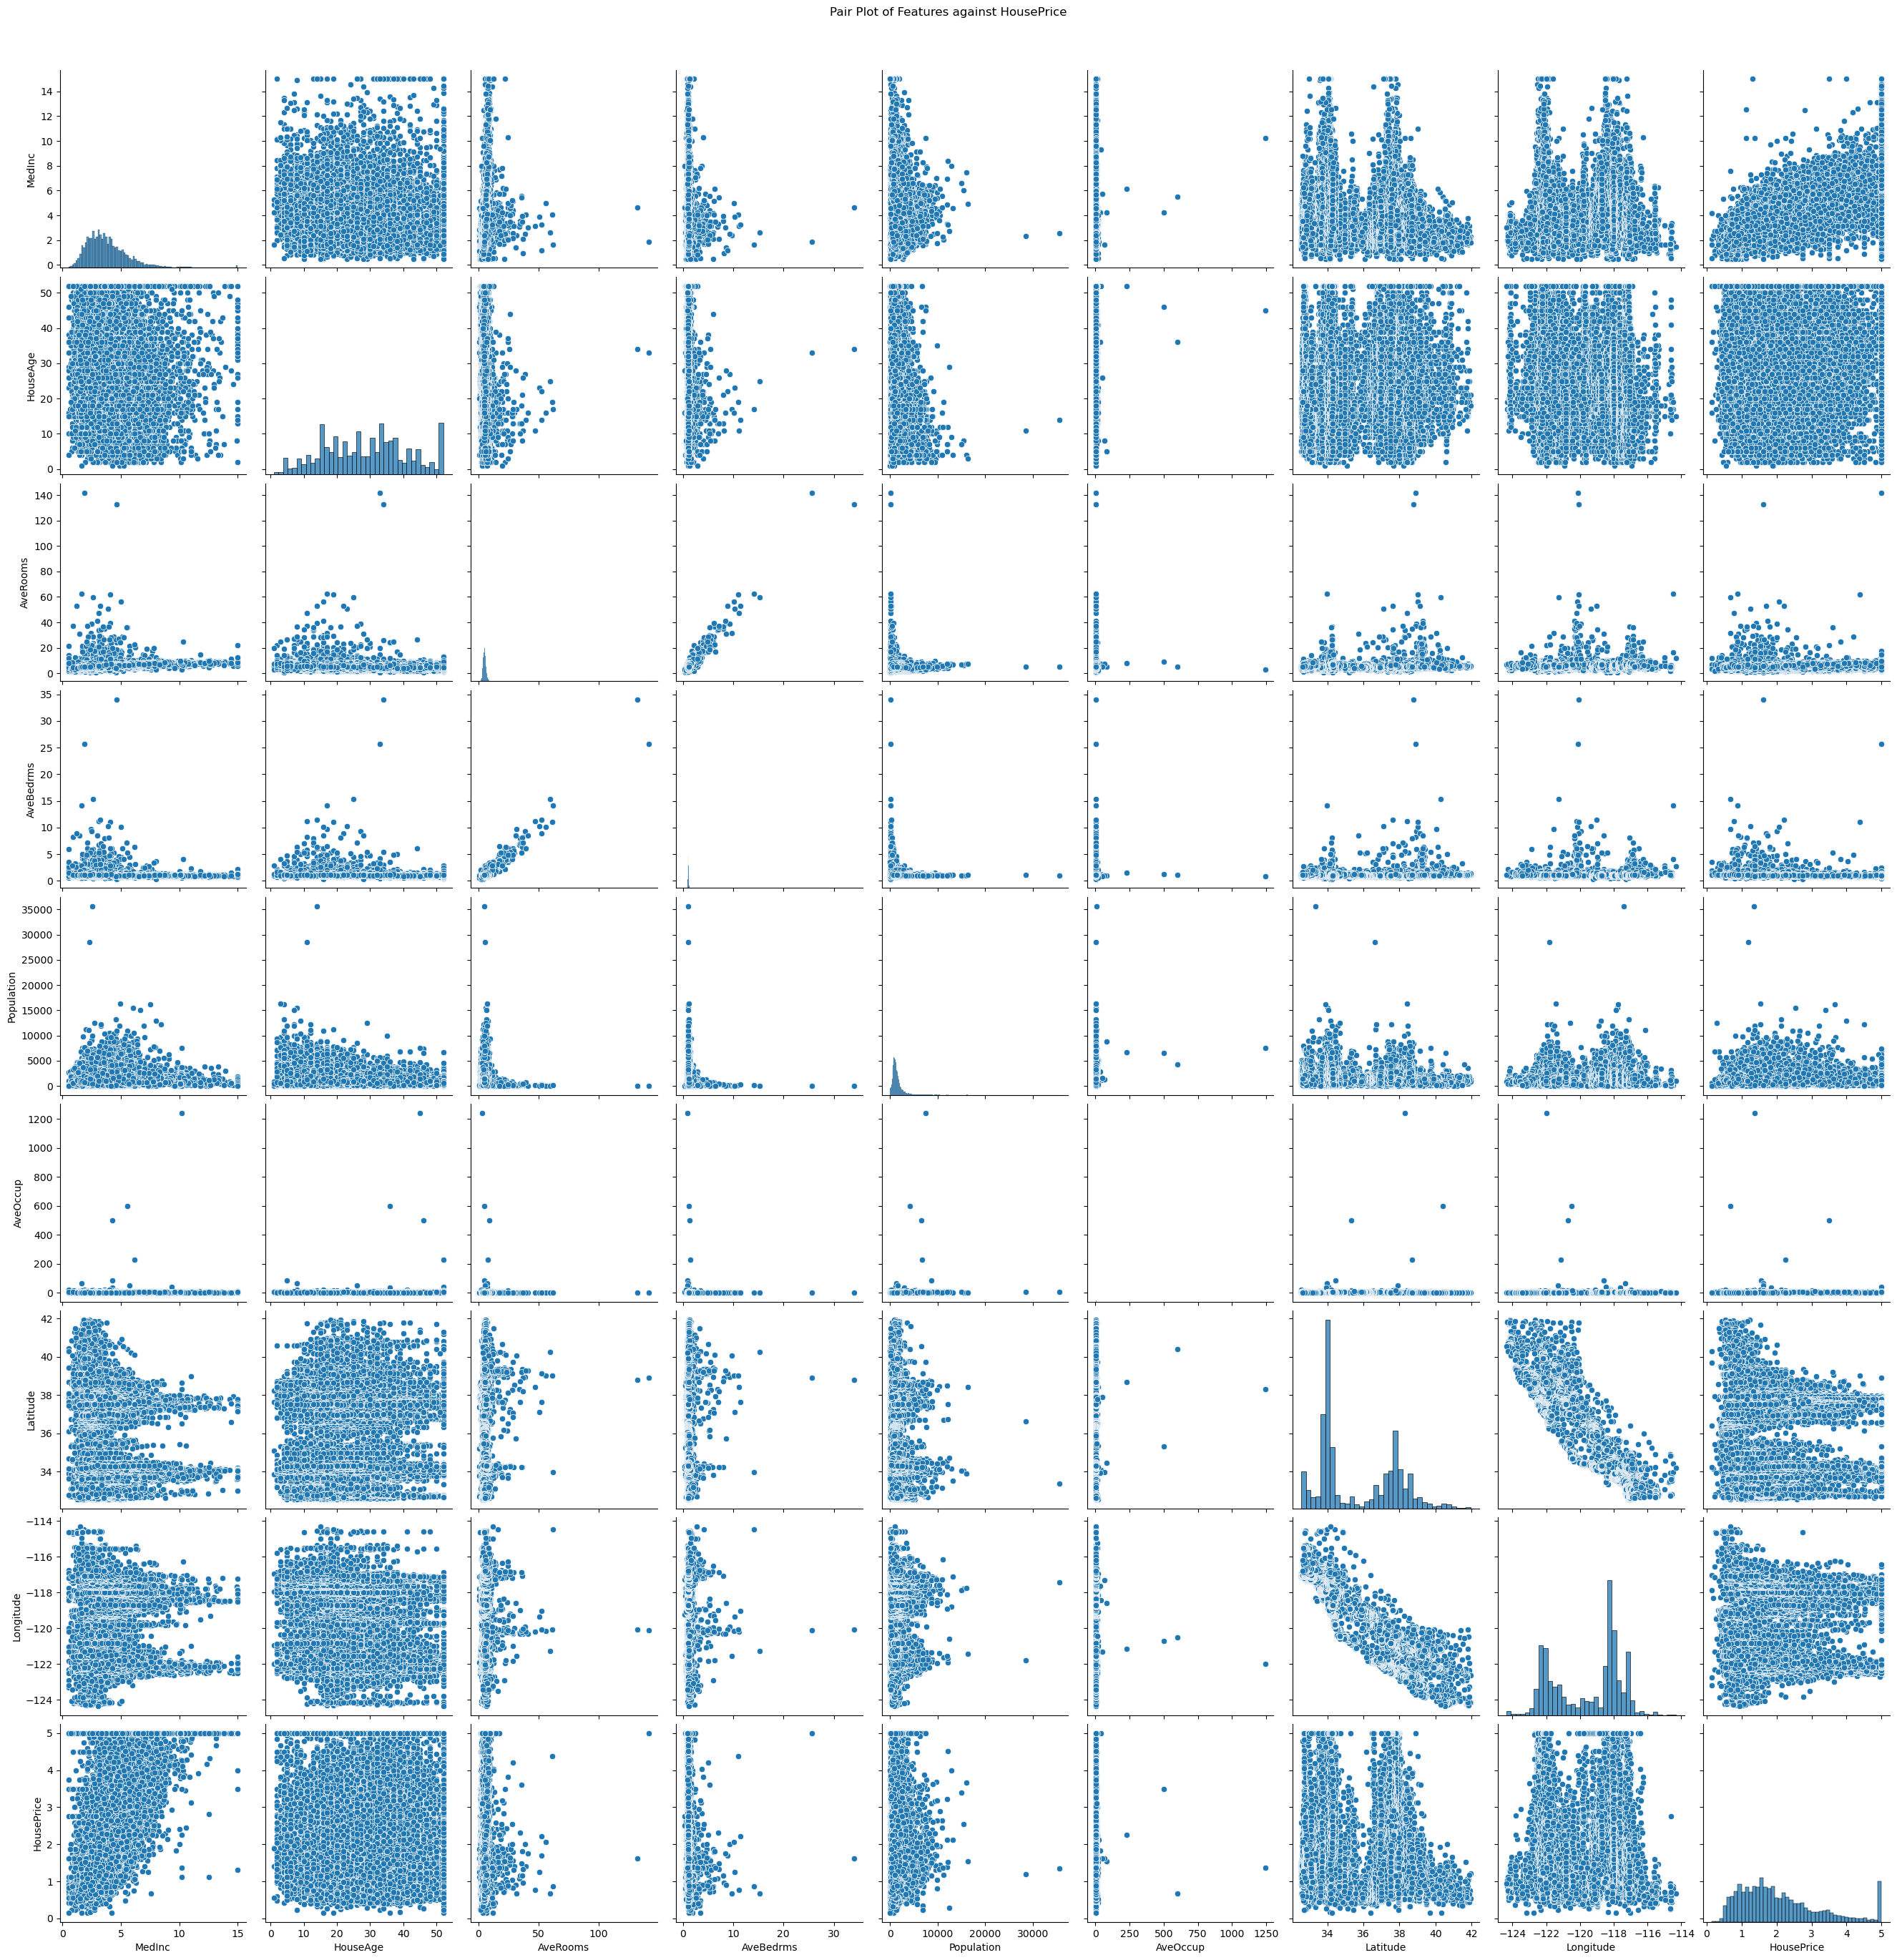

In [12]:
sns.pairplot(housing_df, height = 3)
plt.suptitle('Pair Plot of Features against HousePrice',y = 1.02)
plt.show()

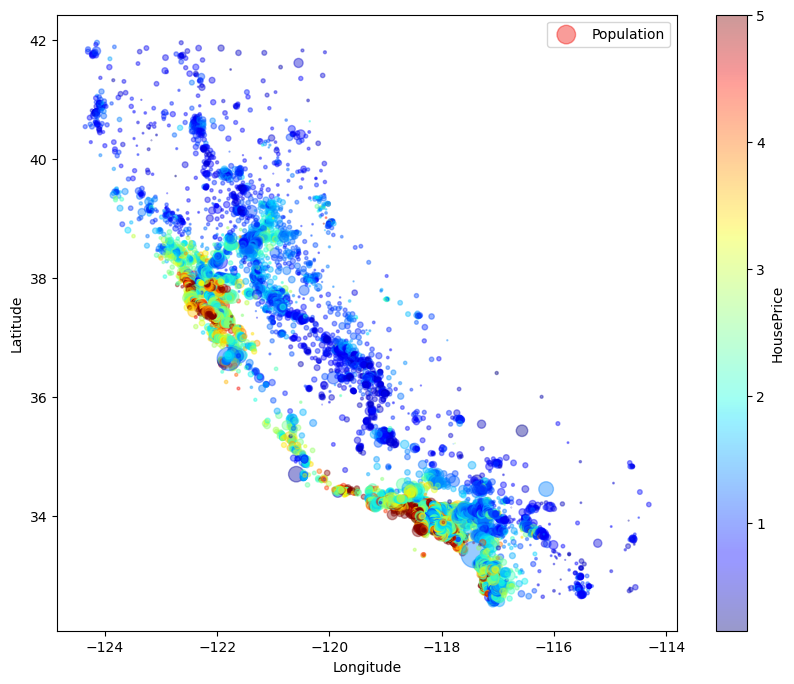

In [13]:
housing_df.plot(
    kind = "scatter",
    x = "Longitude",
    y = "Latitude",
    alpha = 0.4,
    s = housing_df['Population'] / 100, 
    label = "Population",
    c = "HousePrice",
    cmap = "jet",
    colorbar = True,
    figsize = (10,8)
)
plt.show()

<Axes: >

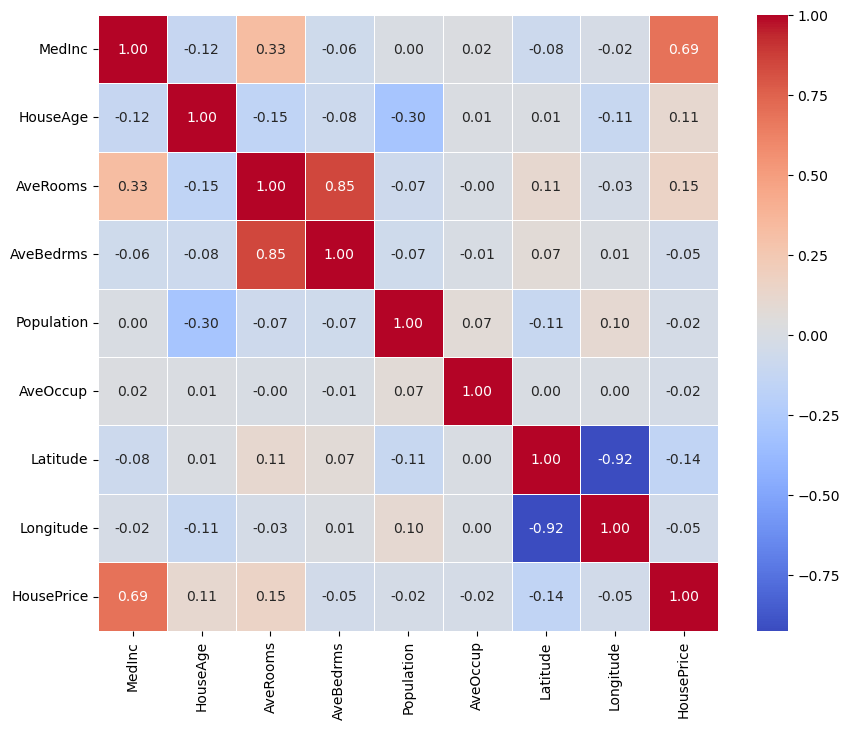

In [14]:
corr = housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True,cmap = 'coolwarm', fmt=".2f", linewidths=0.5 )

In [15]:
corr['HousePrice'].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

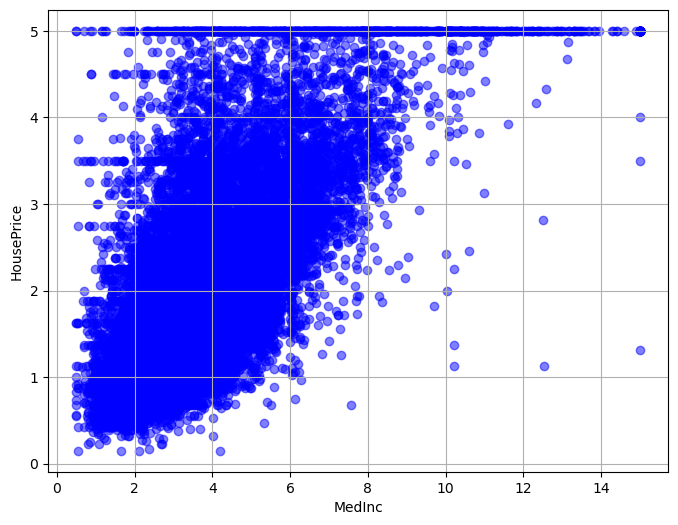

In [16]:
medinc = housing_df['MedInc']
houseprice = housing_df['HousePrice']

plt.figure(figsize = (8,6))
plt.scatter(medinc, houseprice, alpha = 0.5, color = 'blue')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif = housing_df.drop('HousePrice',axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors = 'coerce')

vif_data = pd.DataFrame()
vif_data["Feature"] = housing_df_vif.columns
vif_data["VIf"] = [variance_inflation_factor(housing_df_vif.values,i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

TypeError: 'type' object does not support item assignment